In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import PIL
import numpy as np
import matplotlib.pylab as plt
import os

In [2]:
from modules.utils import load_cifar10, load_cifar100

In [3]:
images, labels = load_cifar10(get_test_data=False)

getting batch 1
getting batch 2
getting batch 3
getting batch 4
getting batch 5


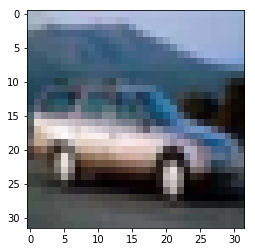

In [4]:
plt.imshow(images[4])

In [5]:
images[4].shape

(32, 32, 3)

In [6]:
trainset = torchvision.datasets.CIFAR10(
    root='./image_files',
    train=True,
    download=False,
    transform=transforms.ToTensor()
)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=False, num_workers=0)

In [7]:
gen = iter(trainloader)

In [8]:
im_cpu, l_cpu = next(gen)

In [14]:
im_cpu_matplotlib = torch.transpose(torch.transpose(im_cpu, -3, -1), -3, -2)

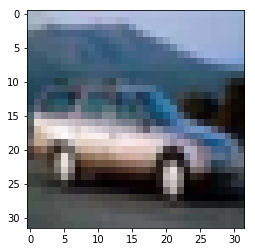

In [15]:
plt.imshow(im_cpu_matplotlib[4])

In [18]:
im_rfft = torch.rfft(im_cpu, 2, onesided=False)

In [19]:
im_rfft.shape

torch.Size([16, 3, 32, 32, 2])

In [35]:
lowpass = torch.ones(32, 32, 2)
lowpass[16:-16,:,:] = 0
lowpass[:,16:-8,:] = 0

In [36]:
lowpass.shape

torch.Size([32, 32, 2])

In [39]:
im_lowpassed_fft = im_rfft * lowpass

In [40]:
im_lowpassed = torch.irfft(im_lowpassed_fft, 2, onesided=False)

In [41]:
im_lowpassed_matplotlib = torch.transpose(torch.transpose(im_lowpassed, -3, -1), -3, -2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


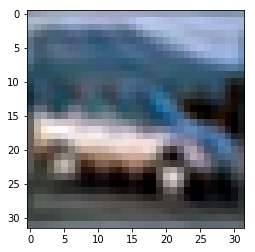

In [42]:
plt.imshow(im_lowpassed_matplotlib[4])

In [29]:
im_lowpassed_matplotlib.dtype

torch.float32

In [30]:
im_cpu_matplotlib.dtype

torch.float32

In [34]:
torch.min(im_lowpassed_matplotlib[4])

tensor(-0.0722)

In [32]:
im_cpu_matplotlib[4]

tensor([[[0.6667, 0.7059, 0.7765],
         [0.6588, 0.6980, 0.7686],
         [0.6941, 0.7255, 0.7961],
         ...,
         [0.6353, 0.7020, 0.8431],
         [0.6196, 0.6980, 0.8392],
         [0.6157, 0.6941, 0.8314]],

        [[0.6588, 0.7098, 0.7765],
         [0.6745, 0.7255, 0.7882],
         [0.6706, 0.7176, 0.7843],
         ...,
         [0.6235, 0.6941, 0.8314],
         [0.6118, 0.6902, 0.8275],
         [0.6039, 0.6824, 0.8196]],

        [[0.6039, 0.6667, 0.7294],
         [0.5843, 0.6471, 0.7098],
         [0.5059, 0.5647, 0.6353],
         ...,
         [0.6314, 0.6980, 0.8392],
         [0.6157, 0.6941, 0.8314],
         [0.6039, 0.6824, 0.8196]],

        ...,

        [[0.2902, 0.3294, 0.3137],
         [0.2980, 0.3333, 0.3176],
         [0.3059, 0.3333, 0.3216],
         ...,
         [0.2784, 0.2941, 0.3059],
         [0.2667, 0.2824, 0.2941],
         [0.2392, 0.2549, 0.2667]],

        [[0.2667, 0.2980, 0.3020],
         [0.2706, 0.3020, 0.3059],
         [0.

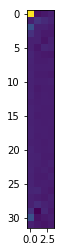

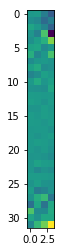

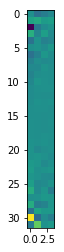

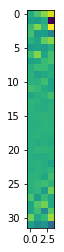

In [54]:
torch.set_printoptions(profile="full")
plt.imshow(im_rfft[4][0][:,:4,0])
plt.show()
plt.imshow(im_rfft[4][0][:,-4:,0])
plt.show()
plt.imshow(im_rfft[4][0][:,:4,1])
plt.show()
plt.imshow(im_rfft[4][0][:,-4:,1])
plt.show()
torch.set_printoptions(profile="default")

In [56]:
torch.set_printoptions(profile="full")
print(im_rfft[4][0][:4,:4,0])
print(im_rfft[4][0][-3:,:4,0])
print(im_rfft[4][0][:4,:4,1])
print(im_rfft[4][0][-3:,:4,1])
torch.set_printoptions(profile="default")

tensor([[369.5294, -14.8267,  -6.8495,   0.6988],
        [  2.9485,  28.3427,  15.0557,   7.9419],
        [ 65.1170,   3.6808,   3.5662,  -1.7547],
        [ 24.0104,   4.6191,  -3.7913,  -3.4851]])
tensor([[ 2.4010e+01, -3.2754e+01,  1.1079e+01, -5.9447e+00],
        [ 6.5117e+01, -1.3193e+01, -5.2441e+00, -2.0483e-02],
        [ 2.9485e+00, -6.3925e+00, -1.1462e+01, -4.1304e+00]])
tensor([[  0.0000, -21.3226, -13.6673,  -5.6371],
        [ 14.4266,  19.7018,   8.3324,  11.5804],
        [-87.8295, -15.5971,  -2.4635,   2.5422],
        [ 23.0526,  -7.5787,  10.9206,  -3.7702]])
tensor([[-23.0526,  13.2578,   5.7579,   7.1211],
        [ 87.8295, -26.2204,  -2.2458, -12.1997],
        [-14.4266,  45.7873,   1.3944,   6.4017]])


In [77]:
im_rfft_small = torch.rfft(im_cpu[:,:,:16,:16], 2, onesided=False)

In [78]:
im_rfft_small.shape

torch.Size([16, 3, 16, 16, 2])

In [80]:
torch.set_printoptions(precision=2, profile="full", linewidth=250)
print(im_rfft_small[4][0][:,:,0])
print()
print(im_rfft_small[4][0][:,:,1])
torch.set_printoptions(profile="default")

tensor([[ 8.39e+01, -2.24e+00,  1.29e+00, -4.66e-01, -5.10e-02, -8.37e-01, -7.82e-01, -3.91e-01, -3.10e-01, -3.91e-01, -7.82e-01, -8.37e-01, -5.10e-02, -4.66e-01,  1.29e+00, -2.24e+00],
        [ 2.06e+01, -1.81e+00,  1.18e+00,  8.53e-01,  6.15e-02, -3.33e-02, -6.14e-01,  2.98e-01, -1.21e-01, -1.83e-01, -4.79e-01, -1.02e+00,  1.25e+00, -2.79e-01, -3.19e-01,  2.15e+00],
        [ 1.29e+01,  1.42e+00, -2.06e-01,  1.96e+00, -5.73e-01,  1.12e+00,  4.37e-01,  6.10e-01, -2.34e-01, -2.86e-01, -5.58e-01, -1.31e-01,  1.54e-02, -3.43e-01, -7.14e-01, -3.21e+00],
        [ 9.83e+00,  1.36e-01, -4.89e-01,  1.75e-01, -3.85e-01,  8.09e-01,  6.23e-01, -3.00e-01, -3.23e-02, -3.90e-01, -4.49e-01, -3.64e-01, -1.24e+00, -1.89e+00, -4.78e-01, -9.51e-01],
        [ 3.93e+00,  5.06e-01, -5.11e-01, -2.63e-01,  1.61e-01, -5.43e-01,  4.83e-01, -2.24e-01,  5.29e-01, -1.73e-01, -4.55e-02, -4.38e-01,  1.76e-01, -1.08e+00, -6.48e-01,  7.73e-02],
        [-3.69e-01,  8.78e-01,  8.09e-01,  3.21e-01,  9.44e-02, -1.58e

tensor([[ 3.02e-01,  1.77e-01,  2.05e-01,  2.28e-01,  1.06e-01, -2.19e-02,  5.71e-01,  2.29e-01, -2.75e-02,  2.29e-01,  5.71e-01, -2.19e-02,  1.06e-01,  2.28e-01,  2.05e-01,  1.77e-01],
        [ 1.27e-01,  1.58e-01,  2.11e-01,  2.22e-01,  2.56e-01, -6.80e-02,  2.02e-02,  7.21e-01,  6.89e-01, -2.34e-01,  8.85e-02,  1.28e-01,  2.55e-01,  1.25e-01,  9.54e-02,  1.04e-01],
        [-2.45e-01,  6.17e-02,  1.82e-01,  3.73e-01,  7.09e-02,  3.80e-01,  3.71e-01,  7.83e-01,  1.42e+00, -8.19e-01, -3.91e-01, -6.25e-01, -4.07e-01,  2.24e-01,  6.27e-02,  1.81e-01],
        [ 1.05e-01, -1.89e-03,  3.71e-01, -1.58e-01,  9.44e-02,  3.21e-01,  8.09e-01,  8.78e-01, -3.69e-01, -4.65e-01, -1.09e+00, -6.31e-01, -2.86e-01,  5.92e-01,  2.71e-01,  9.56e-02],
        [ 5.29e-01, -2.24e-01,  4.83e-01, -5.43e-01,  1.61e-01, -2.63e-01, -5.11e-01,  5.06e-01,  3.93e+00,  7.73e-02, -6.48e-01, -1.08e+00,  1.76e-01, -4.38e-01, -4.55e-02, -1.73e-01],
        [-3.23e-02, -3.00e-01,  6.23e-01,  8.09e-01, -3.85e-01,  1.75e

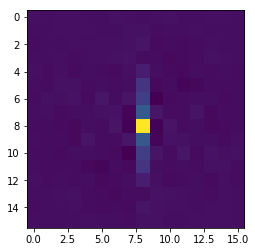

tensor([[ 0.00e+00, -9.35e-02, -2.18e-01, -1.95e-02,  3.14e-02, -1.24e-01, -4.69e-01, -5.43e-01,  0.00e+00,  5.43e-01,  4.69e-01,  1.24e-01, -3.14e-02,  1.95e-02,  2.18e-01,  9.35e-02],
        [ 2.94e-01,  9.23e-02, -4.03e-02, -2.74e-02, -1.24e-01, -6.34e-01, -2.88e-01, -6.02e-01, -1.06e+00,  5.42e-01,  3.16e-01,  3.14e-01,  1.04e-01,  1.52e-01,  2.69e-01,  1.19e-01],
        [ 1.06e-01,  1.14e-01, -1.75e-01,  1.56e-01,  1.26e-01, -1.00e+00, -1.26e+00, -1.23e+00,  9.17e-01,  8.39e-01, -2.48e-01,  6.13e-01,  8.81e-02,  1.37e-01,  2.49e-01,  1.65e-01],
        [-2.50e-01,  1.91e-01, -1.53e-01,  4.53e-01, -2.36e-01, -5.50e-01, -5.93e-02, -1.04e+00,  1.89e+00, -1.41e-01, -4.02e-01,  1.58e-01, -4.39e-02,  6.87e-02,  4.37e-01,  9.78e-02],
        [ 7.84e-03,  1.90e-01, -2.75e-01, -5.42e-01,  1.18e-01, -5.95e-01,  7.71e-01, -3.24e-01,  8.24e-01,  7.65e-01,  6.67e-01,  6.45e-01,  5.41e-01,  2.20e-01,  1.39e-01,  4.90e-02],
        [ 1.38e-01, -3.96e-01,  2.63e-01, -9.35e-01,  3.84e-01, -1.23e

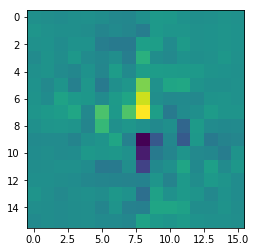

In [83]:
n = im_rfft_small.shape[2] // 2
im_rfft_small_shifted = torch.cat((im_rfft_small[:,:,n:,:,:], im_rfft_small[:,:,:n,:,:]), dim=-3)
im_rfft_small_shifted = torch.cat((im_rfft_small_shifted[:,:,:,n:,:], im_rfft_small_shifted[:,:,:,:n,:]), dim=-2)
torch.set_printoptions(precision=2, profile="full", linewidth=250)
print(im_rfft_small_shifted[4][0][:,:,0])
plt.imshow(im_rfft_small_shifted[4][0][:,:,0])
plt.show()
print(im_rfft_small_shifted[4][0][:,:,1])
plt.imshow(im_rfft_small_shifted[4][0][:,:,1])
plt.show()
torch.set_printoptions(profile="default")

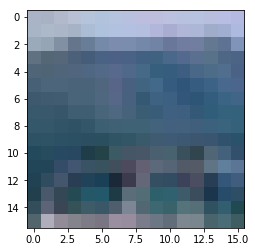

In [91]:
plt.imshow(transforms.ToPILImage()(im_cpu[4,:,:16,:16]))

In [92]:
im = transforms.ToPILImage()(im_cpu[4,:,:16,:16])

In [94]:
im_smaller = im.resize((15, 15), resample=PIL.Image.LANCZOS)

In [95]:
im_rfft_smaller = torch.rfft(transforms.ToTensor()(im_smaller), 2, onesided=False)

tensor([[ 1.93e-01,  1.69e-01,  2.14e-01,  1.65e-01, -1.04e-01,  2.00e-01,  4.72e-01,  3.76e-01, -3.11e-02,  2.36e-01,  4.03e-02,  1.80e-01,  1.59e-01,  1.08e-01,  1.40e-01],
        [ 1.83e-02,  1.26e-01,  3.15e-01,  9.24e-02,  1.73e-01,  1.81e-01,  6.34e-01,  1.21e+00, -6.11e-01, -2.75e-01, -4.18e-01, -2.44e-01,  1.75e-01,  8.10e-02,  5.48e-02],
        [ 5.12e-02,  2.79e-01, -5.69e-02,  3.86e-02,  2.45e-01,  7.01e-01,  7.17e-01, -1.75e-01, -4.46e-01, -9.31e-01, -5.66e-01, -2.59e-01,  4.96e-01,  2.06e-01,  5.01e-02],
        [ 4.32e-02,  3.14e-01, -4.70e-01,  1.58e-01, -3.13e-01, -4.01e-01,  4.57e-01,  3.47e+00,  9.17e-02, -5.62e-01, -9.65e-01,  1.74e-01, -3.71e-01, -6.18e-02,  1.04e-01],
        [-2.25e-01,  4.41e-01,  6.36e-01, -3.39e-01,  7.37e-02, -4.25e-01,  1.61e-01,  8.82e+00, -8.46e-01, -4.02e-01, -1.69e+00, -1.14e+00, -3.13e-01, -3.75e-01, -2.34e-01],
        [ 2.19e-01,  4.62e-01,  1.01e+00, -4.84e-01,  1.74e+00, -1.83e-01,  1.31e+00,  1.15e+01, -2.81e+00, -6.17e-01, -2.94e

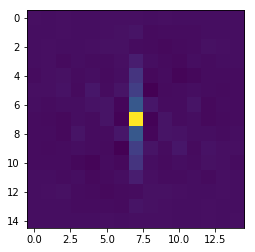

tensor([[ 1.01e-01, -9.26e-02, -4.62e-02, -6.49e-02, -3.99e-01, -3.16e-01, -5.85e-01, -5.76e-01,  5.39e-01,  3.60e-01,  2.24e-01,  4.62e-03,  7.91e-02,  2.23e-01,  1.13e-01],
        [ 7.20e-02, -9.15e-02,  7.81e-02,  7.31e-02, -8.94e-01, -9.73e-01, -1.07e+00,  4.80e-01,  7.68e-01, -1.05e-01,  5.19e-01,  9.60e-02,  1.48e-01,  2.21e-01,  1.50e-01],
        [ 3.44e-02, -1.35e-01,  3.91e-01, -2.03e-01, -5.62e-01, -1.71e-01, -1.03e+00,  1.70e+00, -2.40e-02, -3.04e-01,  1.63e-01, -3.59e-02,  7.81e-02,  3.44e-01, -4.04e-02],
        [ 1.21e-01, -2.11e-01, -4.24e-01,  7.17e-02, -5.07e-01,  6.98e-01, -3.25e-01,  5.65e-01,  6.91e-01,  6.09e-01,  5.86e-01,  4.69e-01,  1.90e-01,  1.13e-01, -7.86e-03],
        [-1.49e-01,  3.98e-02, -8.25e-01,  3.66e-01, -1.12e+00, -1.56e-02,  3.04e-01,  3.45e+00,  9.03e-02,  1.13e+00,  1.21e+00,  1.40e-01, -2.60e-02,  2.15e-02,  4.76e-02],
        [-8.44e-02,  7.33e-01,  3.99e-01,  4.07e-01, -3.24e-01,  5.59e-01,  1.04e+00,  4.99e+00, -3.51e-02, -3.53e-01, -3.40e

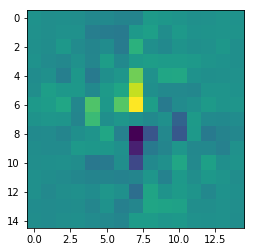

In [106]:
n = im_rfft_smaller.shape[2] // 2 + 1
im_rfft_smaller_shifted = torch.cat((im_rfft_smaller[:,n:,:,:], im_rfft_smaller[:,:n,:,:]), dim=-3)
im_rfft_smaller_shifted = torch.cat((im_rfft_smaller_shifted[:,:,n:,:], im_rfft_smaller_shifted[:,:,:n,:]), dim=-2)
torch.set_printoptions(precision=2, profile="full", linewidth=250)
print(im_rfft_smaller_shifted[0][:,:,0])
plt.imshow(im_rfft_smaller_shifted[0][:,:,0])
plt.show()
print(im_rfft_smaller_shifted[0][:,:,1])
plt.imshow(im_rfft_smaller_shifted[0][:,:,1])
plt.show()
torch.set_printoptions(profile="default")

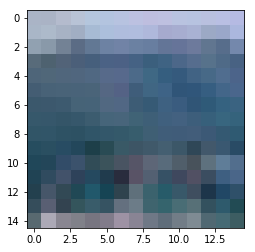

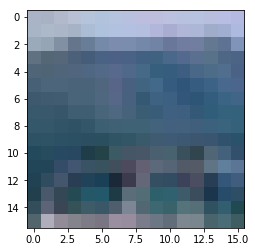

In [99]:
plt.imshow(im_smaller)
plt.show()
plt.imshow(im)
plt.show()

tensor([[ 0.00e+00, -9.35e-02, -2.18e-01, -1.95e-02,  3.14e-02, -1.24e-01, -4.69e-01, -5.43e-01,  0.00e+00,  5.43e-01,  4.69e-01,  1.24e-01, -3.14e-02,  1.95e-02,  2.18e-01,  9.35e-02],
        [ 2.94e-01,  9.23e-02, -4.03e-02, -2.74e-02, -1.24e-01, -6.34e-01, -2.88e-01, -6.02e-01, -1.06e+00,  5.42e-01,  3.16e-01,  3.14e-01,  1.04e-01,  1.52e-01,  2.69e-01,  1.19e-01],
        [ 1.06e-01,  1.14e-01, -1.75e-01,  1.56e-01,  1.26e-01, -1.00e+00, -1.26e+00, -1.23e+00,  9.17e-01,  8.39e-01, -2.48e-01,  6.13e-01,  8.81e-02,  1.37e-01,  2.49e-01,  1.65e-01],
        [-2.50e-01,  1.91e-01, -1.53e-01,  4.53e-01, -2.36e-01, -5.50e-01, -5.93e-02, -1.04e+00,  1.89e+00, -1.41e-01, -4.02e-01,  1.58e-01, -4.39e-02,  6.87e-02,  4.37e-01,  9.78e-02],
        [ 7.84e-03,  1.90e-01, -2.75e-01, -5.42e-01,  1.18e-01, -5.95e-01,  7.71e-01, -3.24e-01,  8.24e-01,  7.65e-01,  6.67e-01,  6.45e-01,  5.41e-01,  2.20e-01,  1.39e-01,  4.90e-02],
        [ 1.38e-01, -3.96e-01,  2.63e-01, -9.35e-01,  3.84e-01, -1.23e

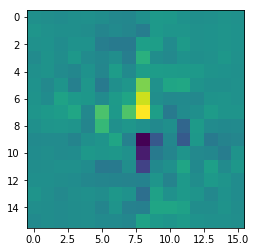

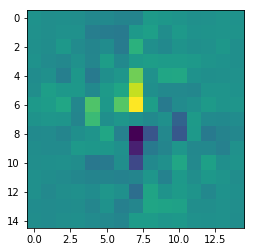

In [107]:
torch.set_printoptions(precision=2, profile="full", linewidth=250)
print(im_rfft_small_shifted[4][0][:,:,1])
print()
print(im_rfft_smaller_shifted[0][:,:,1])
plt.imshow(im_rfft_small_shifted[4][0][:,:,1])
plt.show()
plt.imshow(im_rfft_smaller_shifted[0][:,:,1])
plt.show()
torch.set_printoptions(profile="default")

In [102]:
im_rfft_smaller_shifted[0][:,:,1].argmin()

tensor(143)

In [104]:
print(im_rfft_smaller_shifted[0][:,:,1].min())

tensor(-6.0574)
